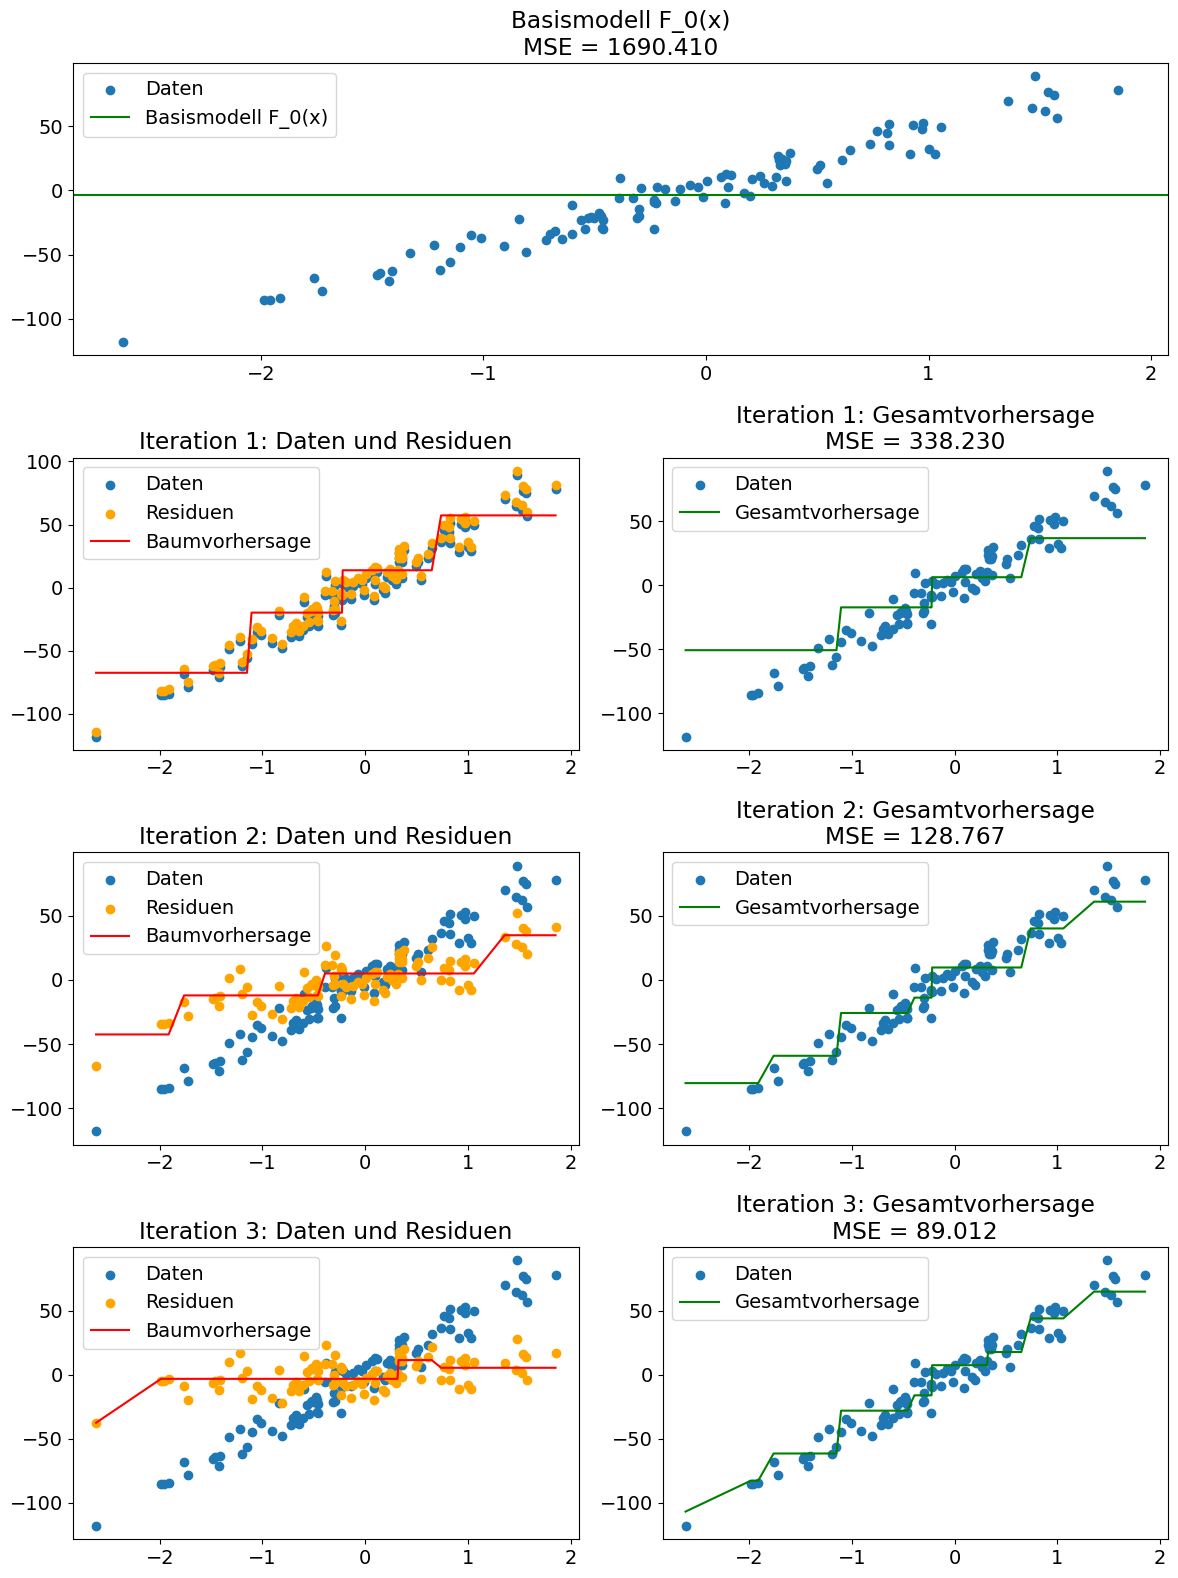

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Synthetischen Datensatz erstellen
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X_sorted, X_indices = np.sort(X, axis=0), np.argsort(X, axis=0)

# Basismodell F_0(x) als Durchschnitt der y-Werte
F_0 = np.mean(y)

# Anzahl der Iterationen
M = 3

# Gesamtfigur initialisieren
plt.figure(figsize=(12, 4 * (M + 1)))

# Visualisierung von F_0(x)
mse_F0 = mean_squared_error(y, np.full(y.shape, F_0))
plt.subplot(M + 1, 2, (1, 2))  # Basismodell über die gesamte Breite
plt.scatter(X, y, label='Daten')
plt.axhline(y=F_0, color='green', label='Basismodell F_0(x)')
plt.title(f'Basismodell F_0(x)\nMSE = {mse_F0:.3f}')
plt.legend()

# Alpha-Wert (Lernrate) erhöhen
alpha = 0.7

# GBT-Modell
F_m = np.full(y.shape, F_0)

for m in range(1, M + 1):
    # Pseudo-Residuen berechnen
    r = y - F_m

    # Entscheidungsbaum auf Pseudo-Residuen trainieren
    h_m = DecisionTreeRegressor(max_depth=2)
    h_m.fit(X, r)

    # Update des Modells
    F_m += alpha * h_m.predict(X)

    # Baumvorhersagen für sortierte X-Werte berechnen
    h_m_pred_sorted = h_m.predict(X_sorted)

    # Mean Squared Error berechnen
    mse = mean_squared_error(y, F_m)

    # Visualisierung für diese Iteration (Daten und Residuen)
    plt.subplot(M + 1, 2, 2 * m + 1)
    plt.scatter(X, y, label='Daten')
    plt.scatter(X, r, label='Residuen', color='orange')
    plt.plot(X_sorted, h_m_pred_sorted, color='red', label='Baumvorhersage')
    plt.title(f'Iteration {m}: Daten und Residuen')
    plt.legend()

    # Visualisierung für diese Iteration (Gesamtvorhersage)
    plt.subplot(M + 1, 2, 2 * m + 2)
    plt.scatter(X, y, label='Daten')
    plt.plot(X_sorted, F_m[X_indices], color='green', label='Gesamtvorhersage')
    plt.title(f'Iteration {m}: Gesamtvorhersage\nMSE = {mse:.3f}')
    plt.legend()

# Gesamtbild speichern
plt.tight_layout()
plt.savefig('../Images/GBT_Example.png')
plt.show()
